In [1]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression
from sklearn.decomposition import PCA
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
dfred = pd.read_csv('winequality-red.csv', delimiter=';')
dfwhite = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
dfred.columns == dfwhite.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [4]:
df = pd.concat([dfred, dfwhite])
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [5]:
#Random Numbers to remove from data frame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
X = df.iloc[:,:-1] #independent variables
Y = df.iloc[:,-1] #dependent variable (classification) is the _golden column

In [7]:
X = MinMaxScaler().fit_transform(X)

In [8]:
Y = Y.as_matrix()

# Naive Bayes

In [9]:
def naive(X_train, Y_train, X_test, Y_test, ts): 
    nb = naive_bayes.GaussianNB()
    nb.fit(X_train,Y_train)

    ypred_nb = nb.predict(X_test)

    e_nb = np.sum((ypred_nb[i] != Y_test[i]) for i in range(0,ts))

    perrornb = float(e_nb)/ts
    return perrornb

# SVM Linear Kernel

In [10]:
def svml(X_train, Y_train, X_test, Y_test, ts):  
    svm_linear = svm.SVC(kernel='linear')
    svm_linear.fit(X_train,Y_train)

    ypred_svm_linear = svm_linear.predict(X_test)

    e_svm_linear = np.sum((ypred_svm_linear[i] != Y_test[i]) for i in range(0,ts))
    pererrorsvml = float(e_svm_linear)/ts
    return perrorsvml

# SVM RBF Kernel

In [11]:
def gammachoice(X_train, Y_train, X_test, Y_test, ts, step):  
    l=[]
    for g in range(1,250, step):
        svm_rbf = svm.SVC(kernel='rbf', gamma=float(g))
        svm_rbf.fit(X_train,Y_train)
        ypred_svm_rbf = svm_rbf.predict(X_test)
        e_svm_rbf = float(np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts)))
        l.append((e_svm_rbf/ts))
    plt.plot(range(0,250, step), l)
    plt.xlabel('gamma')
    plt.ylabel('classification percent error')
    minindex = l.index(min(l))
    #tx = plt.xticks(range(0,250, step))
    print "optimal gamma is:", step*minindex
    return step*minindex

In [12]:
def svmrbf(X_train, Y_train, X_test, Y_test, g, ts): 
    svm_rbf = svm.SVC(kernel='rbf', gamma=g)
    svm_rbf.fit(X_train,Y_train)
    
    ypred_svm_rbf = svm_rbf.predict(X_test)
    
    e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
    perrorsvmrbf = float(e_svm_rbf)/ts
    return perrorsvmrbf

# Run to Optimize the size of the train data

percent of data in the training set is: 10.0
optimal gamma is: 20
percent of data in the training set is: 20.0
optimal gamma is: 40
percent of data in the training set is: 30.0
optimal gamma is: 80
percent of data in the training set is: 40.0
optimal gamma is: 90
percent of data in the training set is: 50.0
optimal gamma is: 110
percent of data in the training set is: 60.0
optimal gamma is: 110
percent of data in the training set is: 70.0
optimal gamma is: 140
percent of data in the training set is: 80.0
optimal gamma is: 110
percent of data in the training set is: 90.0
optimal gamma is: 240


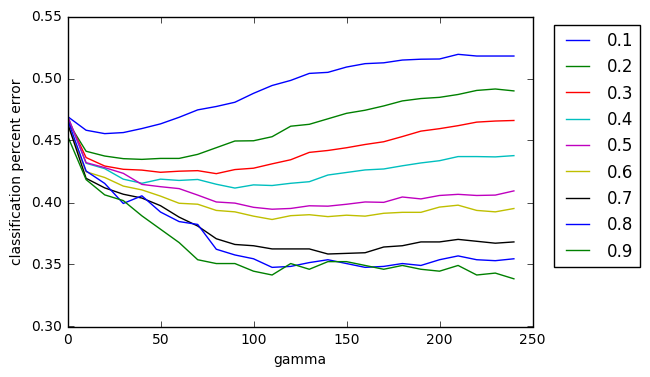

In [13]:
nb = []
svml = []
svmrbf = []

splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in splits:
    print "percent of data in the training set is:", i*100
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i, random_state=123)
    ts = Y_test.shape[0]
    
    #run naive bayes with that split and append percent error to the nb array
    pen = naive(X_train, Y_train, X_test, Y_test, ts)
    nb.append(pen)
    
    #run svm linear with that split and append percent error to the svml array
    #pesl = svml(X_train, Y_train, X_test, Y_test, ts)
    svm_linear = svm.SVC(kernel='linear')
    svm_linear.fit(X_train,Y_train)

    ypred_svm_linear = svm_linear.predict(X_test)

    e_svm_linear = np.sum((ypred_svm_linear[i] != Y_test[i]) for i in range(0,ts))
    pesl = float(e_svm_linear)/ts
    svml.append(pesl)
    
    #choose gamma
    step = 10
    g = gammachoice(X_train, Y_train, X_test, Y_test, ts, step)
    plt.legend(splits, bbox_to_anchor=(1.25, 1.0))
    
    #run svm rbf with that split and optimal gamma and append percent error to the svmrbf array
    #perbf = svmrbf(X_train, Y_train, X_test, Y_test, g, ts)
    svm_rbf = svm.SVC(kernel='rbf', gamma=g)
    svm_rbf.fit(X_train,Y_train)
    
    ypred_svm_rbf = svm_rbf.predict(X_test)
    
    e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
    perbf = float(e_svm_rbf)/ts
    svmrbf.append(perbf)
    

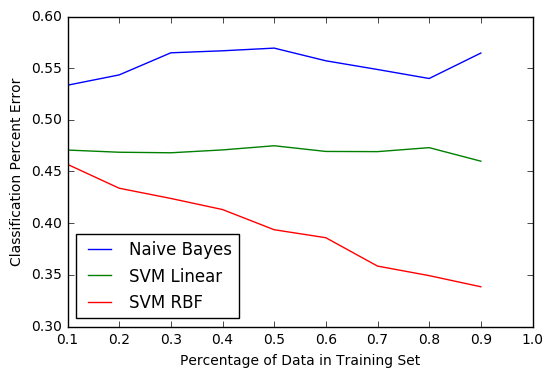

In [14]:
plt.plot(splits, nb)
plt.plot(splits, svml)
plt.plot(splits, svmrbf)
plt.legend(['Naive Bayes', 'SVM Linear', 'SVM RBF'], loc='lower left')
plt.xlabel('Percentage of Data in Training Set')
plt.ylabel('Classification Percent Error')
plt.show()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.7, random_state=123)
ts = Y_test.shape[0]

#run naive bayes with that split and append percent error to the nb array
pen = naive(X_train, Y_train, X_test, Y_test, ts)
print "Naive Bayes Percent Error in Classification ", pen

#run svm linear with that split and append percent error to the svml array
#pesl = svml(X_train, Y_train, X_test, Y_test, ts)
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)

ypred_svm_linear = svm_linear.predict(X_test)

e_svm_linear = np.sum((ypred_svm_linear[i] != Y_test[i]) for i in range(0,ts))
pesl = float(e_svm_linear)/ts
print "Linear SVM Percent Error in Classification ", pesl

#run svm rbf with that split and optimal gamma and append percent error to the svmrbf array
#perbf = svmrbf(X_train, Y_train, X_test, Y_test, g, ts)
svm_rbf = svm.SVC(kernel='rbf', gamma=140)
svm_rbf.fit(X_train,Y_train)

ypred_svm_rbf = svm_rbf.predict(X_test)

e_svm_rbf = np.sum((ypred_svm_rbf[i] != Y_test[i]) for i in range(0,ts))
perbf = float(e_svm_rbf)/ts
print "RBF SVM Percent Error in Classification ", perbf

Naive Bayes Percent Error in Classification  0.548717948718
Linear SVM Percent Error in Classification  0.469230769231
RBF SVM Percent Error in Classification  0.358461538462
